# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [1]:
!git clone https://github.com/siwenliao/EDA
%cd EDA/assignment

Cloning into 'EDA'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 65 (delta 10), reused 8 (delta 8), pack-reused 50 (from 2)
Receiving objects: 100% (65/65), 9.52 MiB | 7.27 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/EDA/assignment


In [59]:
# 1: Loading the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

gift_df = pd.read_csv('./data/ForeignGifts_edu.csv')

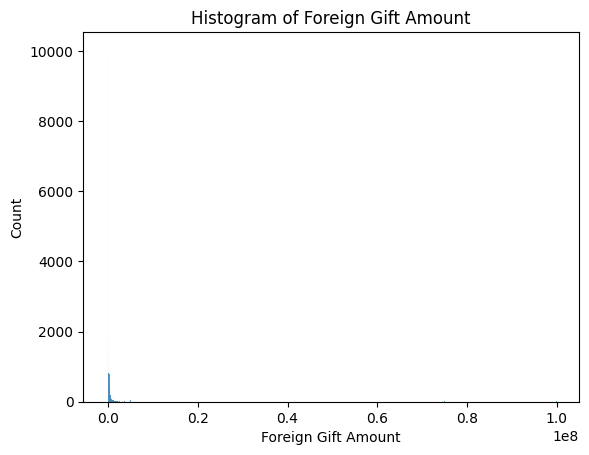

In [26]:
# 2: Histogram
hist = sns.histplot(gift_df['Foreign Gift Amount'])
hist.set(title = 'Histogram of Foreign Gift Amount')
plt.show()

From this histogram, we can see that the variable, Foreign Gift Amount, is right skewed. Most values are clustered around the lower end. The x-axis, representing the gift amount, ranges from 0 to 100,000,000, indicating possible outliers around $1.0 \times 10^8$ that skew the distribution.  

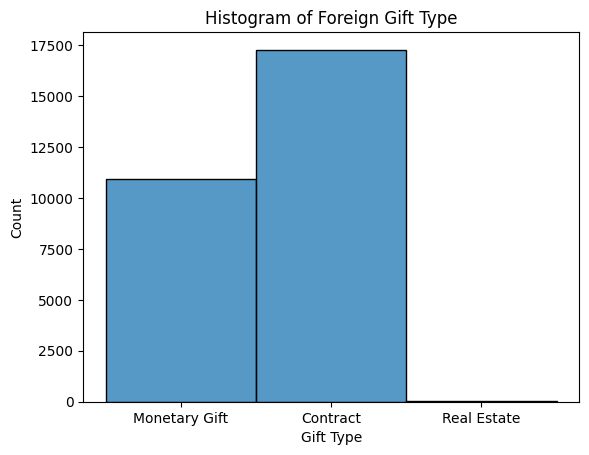

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64 

Proportions: 
 Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64 



In [27]:
# 3: Histogram/Value Counts
hist = sns.histplot(gift_df['Gift Type'])
hist.set(title = 'Histogram of Foreign Gift Type')
plt.show()
print(gift_df['Gift Type'].value_counts(), '\n')
print('Proportions: \n', gift_df['Gift Type'].value_counts(normalize=True), '\n')

0.612097 of the gifts are contracts, 0.000390 are real estate, and 0.387513 are monetary gifts.

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


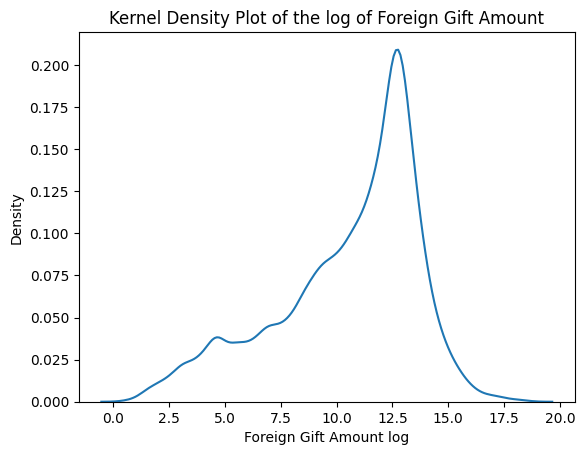

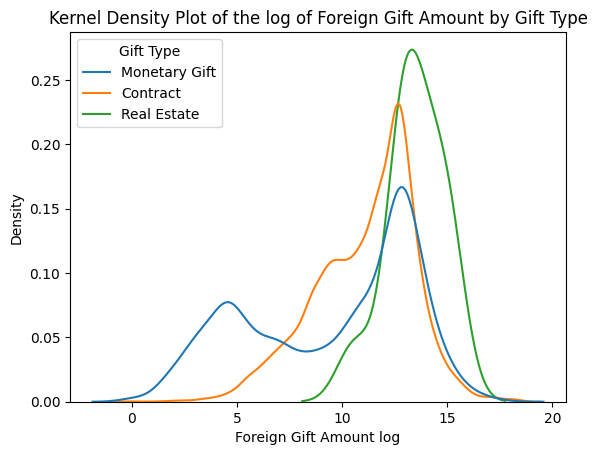

In [55]:
# 4: Kernel Density Plot

gift_df['Foreign Gift Amount log'] = np.log(gift_df['Foreign Gift Amount'])

kde = sns.kdeplot(gift_df.loc[gift_df['Foreign Gift Amount log']>0, 'Foreign Gift Amount log'])
kde.set(title='Kernel Density Plot of the log of Foreign Gift Amount')
plt.show()
kde_type = sns.kdeplot(data=gift_df, x='Foreign Gift Amount log', hue='Gift Type', common_norm=False)
kde_type.set(title='Kernel Density Plot of the log of Foreign Gift Amount by Gift Type')
plt.show()


Patterns noticed

In [42]:
# 5
print('Top 15 countries in terms the number of gifts: \n', gift_df['Country of Giftor'].value_counts().head(15), '\n')
print('Top 15 countries in terms of the amount given: \n', gift_df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15), '\n')


Top 15 countries in terms the number of gifts: 
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64 

Top 15 countries in terms of the amount given: 
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE              

Top 15 institutions in terms of the total amount of money they receive: 
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: For

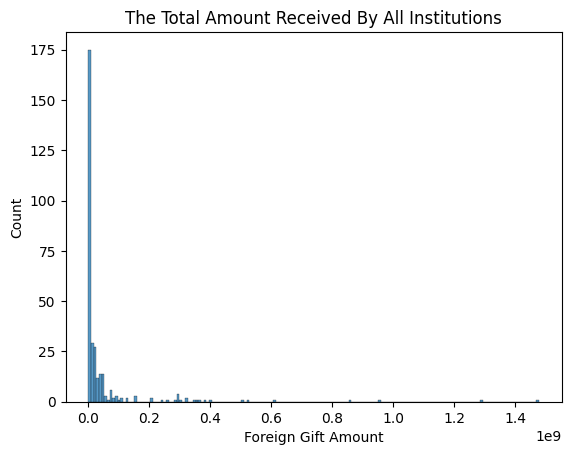

In [43]:
# 6
print('Top 15 institutions in terms of the total amount of money they receive: \n', gift_df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15), '\n')

hist_amount = sns.histplot(gift_df.groupby('Institution Name')['Foreign Gift Amount'].sum())
hist_amount.set(title='The Total Amount Received By All Institutions')
plt.show()

In [46]:
# 7
gift_df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


The giftors that provide the most money, in total, are all associated with Qatar Foundation: Qatar Foundation, Qatar Foundation/Qatar National Res, and Qatar Foundation for Education.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [48]:
# 1: Load the dataset

airbnb_df = pd.read_csv('./data/airbnb_hw.csv')

In [53]:
# 2: Dimensions, observations, and variables

print('Dimensions of data: \n', airbnb_df.shape, '\n')
print('Number of observations: \n', airbnb_df.shape[0], '\n')
print('Variables included: \n', airbnb_df.columns.tolist(), '\n')
airbnb_df.head()

Dimensions of data: 
 (30478, 13) 

Number of observations: 
 30478 

Variables included: 
 ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating'] 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [54]:
# 3: Cross tabulation of Room Type and Property Type

pd.crosstab(airbnb_df['Room Type'], airbnb_df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [ ]:
airbnb_df['Price'] = airbnb_df['Price'].str.replace(",","")
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

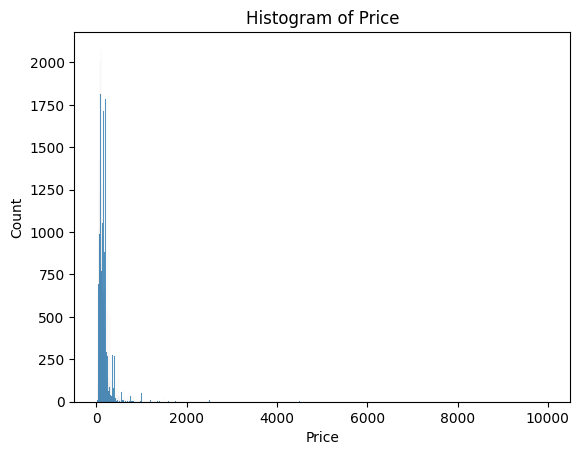

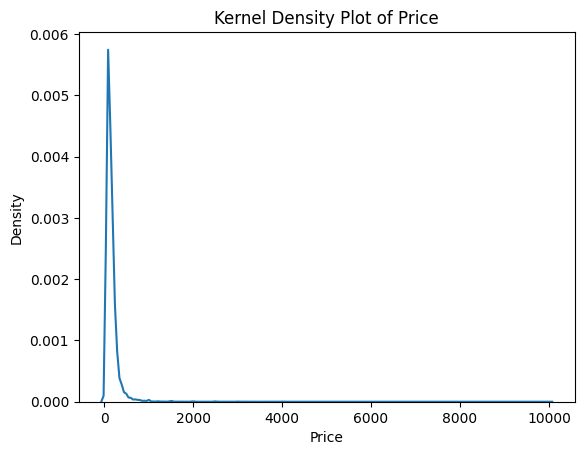

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


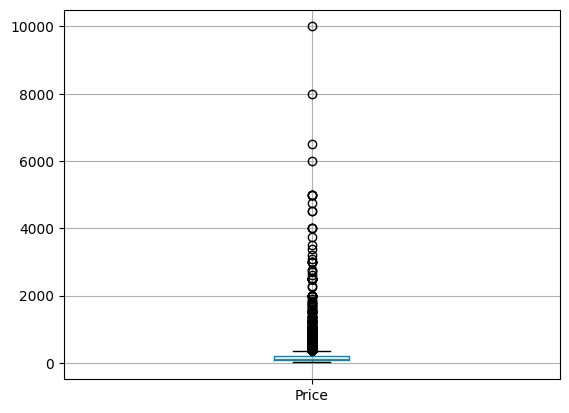

In [62]:
# 4: Price
hist = sns.histplot(airbnb_df['Price'])
hist.set(title = 'Histogram of Price')
plt.show()
kde = sns.kdeplot(airbnb_df['Price'])
kde.set(title = 'Kernel Density Plot of Price')
plt.show()
airbnb_df.boxplot(column = 'Price')
plt.show
airbnb_df['Price'].describe()

Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

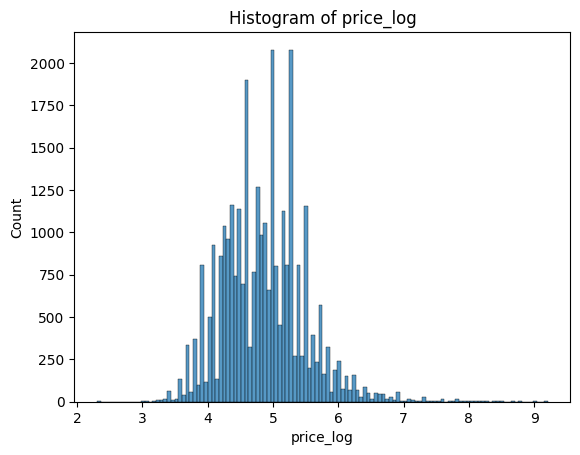

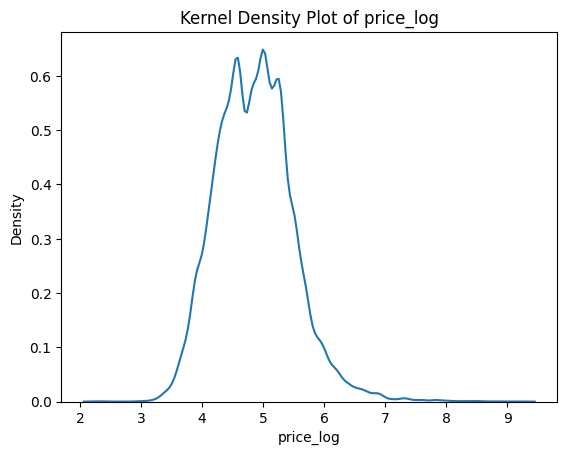

,price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


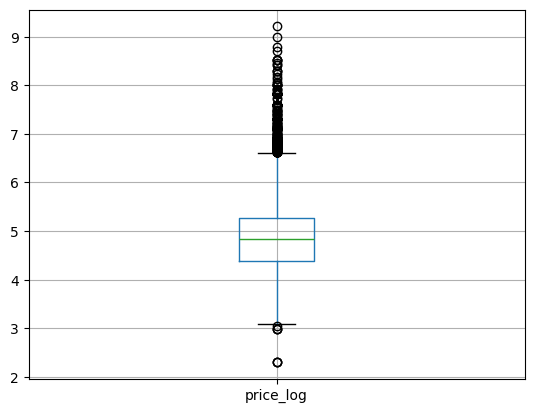

In [64]:
airbnb_df['price_log'] = np.log(airbnb_df['Price'])

hist = sns.histplot(airbnb_df['price_log'])
hist.set(title = 'Histogram of price_log')
plt.show()
kde = sns.kdeplot(airbnb_df['price_log'])
kde.set(title = 'Kernel Density Plot of price_log')
plt.show()
airbnb_df.boxplot(column = 'price_log')
plt.show
airbnb_df['price_log'].describe()


[Text(0.5, 1.0, 'Scatterplot of price_log and Beds')]

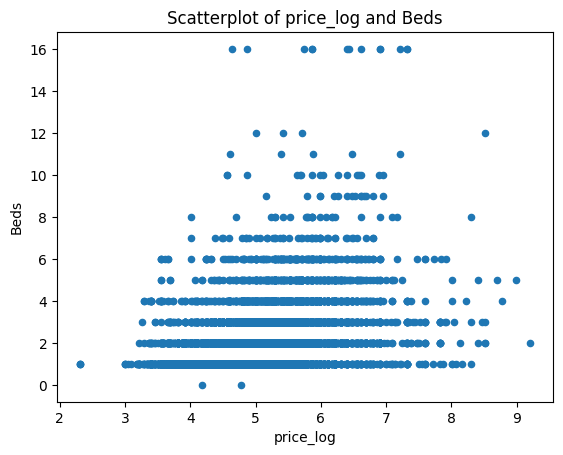

In [66]:
# 5: Scatterplot of price_log and Beds

airbnb_df.plot.scatter(x='price_log', y='Beds').set(title = 'Scatterplot of price_log and Beds')

Description of what I see

In [69]:
airbnb_df.loc[:,['Price','Beds']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

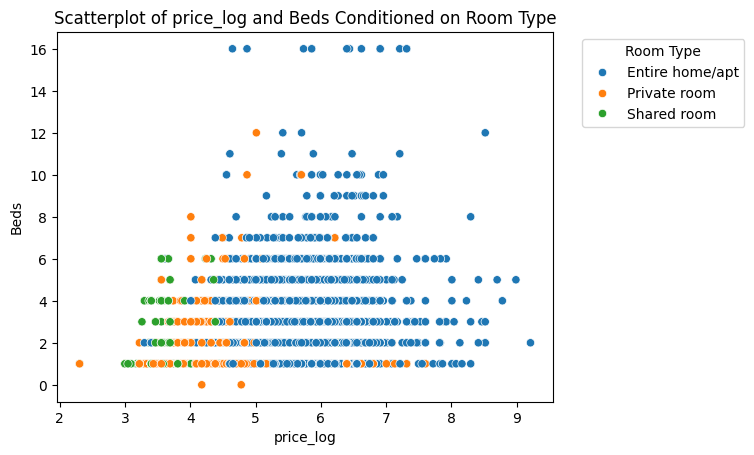

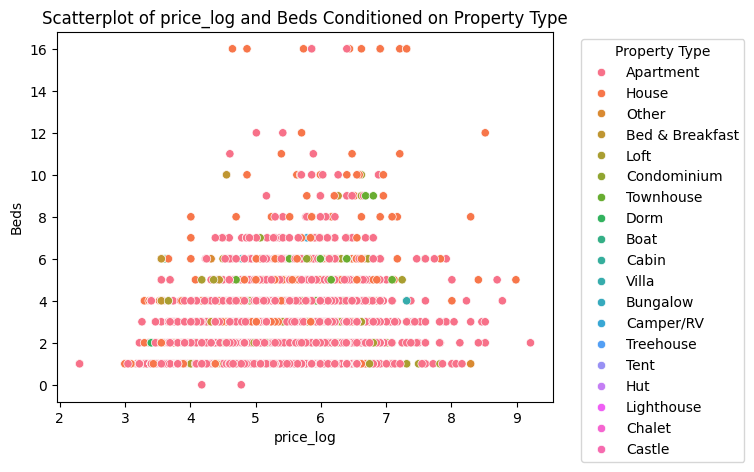

In [78]:
# 6: Colored/grouped scatterplot

scatter1 = sns.scatterplot(data=airbnb_df, x='price_log', y='Beds', hue='Room Type')
scatter1.set(title='Scatterplot of price_log and Beds Conditioned on Room Type')
sns.move_legend(scatter1, "upper right", bbox_to_anchor=(1.4, 1))
plt.show()
scatter2 = sns.scatterplot(data=airbnb_df, x='price_log', y='Beds', hue='Property Type')
scatter2.set(title='Scatterplot of price_log and Beds Conditioned on Property Type')
sns.move_legend(scatter2, "upper right", bbox_to_anchor=(1.4, 1))
plt.show()


Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [83]:
airbnb_df.loc[:,['Room Type', 'Property Type', 'Price']].groupby(['Room Type', 'Property Type']).describe()

Price                                  \
                                   count        mean          std    min   
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                                                  
                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.0

In [95]:
des = airbnb_df.loc[:,['Room Type', 'Property Type', 'Price']].groupby(['Room Type', 'Property Type']).describe()
des.sort_values(by=('Price', 'mean'), ascending=False).head(1)
des.sort_values(by=('Price', 'std'), ascending=False).head(1)

Price                                        \
                              count        mean          std   min    25%   
Room Type       Property Type                                               
Entire home/apt Other          14.0  843.428571  1133.062271  66.0  140.0   

                                                      
                                 50%     75%     max  
Room Type       Property Type                         
Entire home/apt Other          300.0  1112.5  4000.0

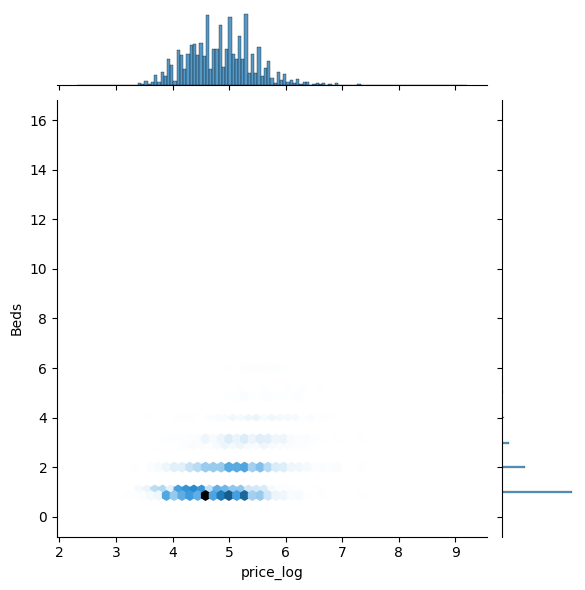

In [97]:
# 7: Jointplot

sns.jointplot(data=airbnb_df, x='price_log', y='Beds', kind='hex')

We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [98]:
# 1: Loading the data

rigs_df = pd.read_csv('./data/drilling_rigs.csv')

print('Dimensions of data: \n', rigs_df.shape, '\n')
print('Number of observations: \n', rigs_df.shape[0], '\n')
print('Number of variables: \n', rigs_df.shape[1], '\n')
print('Variables included: \n', rigs_df.columns.tolist(), '\n')
print('Types of variables: \n', rigs_df.dtypes, '\n')

Dimensions of data: 
 (623, 10) 

Number of observations: 
 623 

Number of variables: 
 10 

Variables included: 
 ['Month', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)', 'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)', 'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)', 'Active Well Service Rig Count (Number of Rigs)'] 

Types of variables: 
 Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, 

In [99]:
# 2: Month

rigs_df['time'] = pd.to_datetime(rigs_df['Month'], format='mixed')

[Text(0.5, 1.0, 'Line Plot of the Total Rigs Over Time')]

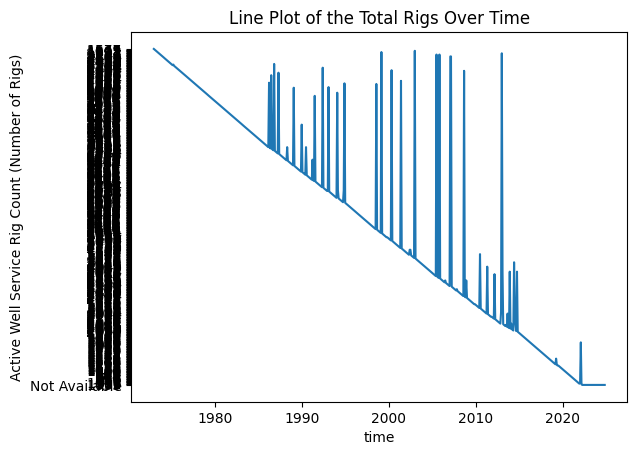

In [101]:
# 3: Active Well Service Rig Count
sns.lineplot(data=rigs_df, x='time', y='Active Well Service Rig Count (Number of Rigs)').set(title='Line Plot of the Total Rigs Over Time')

Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.